In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Slope: [0.05548294]
Intercept: 7.007108428241851
R-squared: 0.8134866044709264
MSE: 6.101072906773964


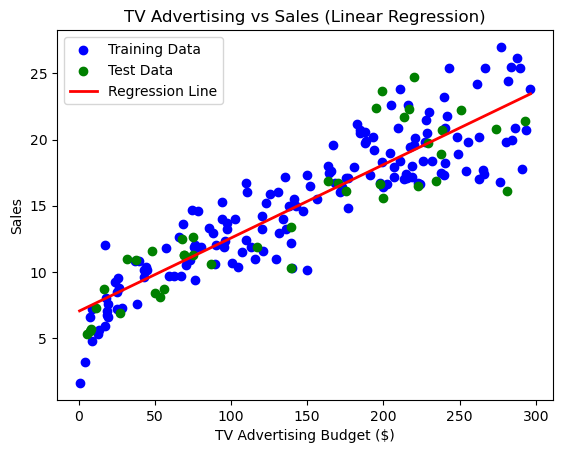

In [4]:
# See TV and Sales
x_independent = data[['TV']] # x must be a 2D data for SKLearn pd.DataFrame(data['TV'])
y_dependent = data['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(x_independent, y_dependent, test_size=0.2, random_state= 42)

my_regression = LinearRegression()
my_regression.fit(X_train, Y_train)

beta_1 = my_regression.coef_
alpha_1  = my_regression.intercept_
r_squared_1 = my_regression.score(X_train, Y_train)

y_hat = my_regression.predict(X_test)
mean_sq_err_1 = metrics.mean_squared_error(Y_test, y_hat)

print("Slope:", beta_1)
print("Intercept:", alpha_1)
print("R-squared:", r_squared_1)
print("MSE:", mean_sq_err_1)

# Generate x values for the regression line
x_range = np.linspace(X_train.min(), X_train.max(), 100)  # Create evenly spaced points
y_range = beta_1 * x_range + alpha_1  # Compute corresponding y values

# Plot the data points
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='green', label='Test Data')

# Plot the regression line
plt.plot(x_range, y_range, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("TV Advertising Budget ($)")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales (Linear Regression)")
plt.legend()
plt.show()

In [7]:
# Repeat the above with Standard Scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_regression_std_scaler_1 = LinearRegression()
my_regression_std_scaler_1.fit(X_train_scaled, Y_train)

beta_scaled_1 = my_regression_std_scaler_1.coef_
alpha_scaled_1 = my_regression_std_scaler_1.intercept_
r_squared_scaled_1 = my_regression_std_scaler_1.score(X_train_scaled, Y_train)

print("Slope:", beta_scaled_1)
print("Intercept:", round(alpha_scaled_1,2))
print("R-squared:", r_squared_scaled_1)

Slope: [4.66914684]
Intercept: 15.33
R-squared: 0.8134866044709264


1. Why Do We Fit on X_train Only?

Fitting (fit_transform) computes the mean and standard deviation from X_train and then scales it.

We want to ensure that the test set (X_test) is scaled using the same statistics from the training set.

This ensures that the model generalizes well to unseen data.

2. Why Do We Not Fit on X_test?

If we also fit the scaler separately on X_test, it would compute a different mean and standard deviation, leading to different scales.

This would invalidate the model, as it was trained on data standardized using X_train's statistics.

Instead, we only transform X_test using the parameters (mean & standard deviation) learned from X_train.

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
forest = RandomForestRegressor()
#Fit the model
forest.fit(X_train_scaled, Y_train)
#Calculating metrics
r_squared_RF = forest.score(X_train_scaled, Y_train)
print("R-Squared: ", r_squared_RF)

y_hat_RF = forest.predict(X_test_scaled)
mean_sq_err = metrics.mean_squared_error(Y_test, y_hat_RF)
print("Mean Squared Error:", mean_sq_err)

R-Squared:  0.95736503535541
Mean Squared Error: 5.104966662624999


In [10]:
# forest.coef_

In [13]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, Y_train)
#Calculating metrics
r_squared_lasso = lasso_reg.score(X_train_scaled, Y_train)
print("R-Squared: ", r_squared_lasso)

y_hat_lasso = lasso_reg.predict(X_test_scaled)
mean_sq_err_lasso = metrics.mean_squared_error(Y_test, y_hat_lasso)
print("Mean Squared Error:", mean_sq_err_lasso)

R-Squared:  0.8131134614350995
Mean Squared Error: 6.112568105942902


# Bias and Variance

In [14]:
bias_lasso = (np.mean(y_hat_lasso) - np.mean(Y_test)) ** 2

variance_lasso = np.var(y_hat_lasso)

print("Bias in the predicted data using Lasso Regression (scaled data):", bias_lasso)
print("Variance in the predicted data using Lasso Regression (scaled data):", variance_lasso)

Bias in the predicted data using Lasso Regression (scaled data): 0.037049701789708844
Variance in the predicted data using Lasso Regression (scaled data): 24.070360613001817


In [16]:
#data.head()

# Multiple Linear Regression

In [19]:
# See TV ,Radio, Newspaper v/s Sales
x_independent = data[['TV', 'Radio', 'Newspaper']] 
y_dependent = data['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(x_independent, y_dependent, test_size=0.2, random_state= 42)

my_MLregression = LinearRegression()
my_MLregression.fit(X_train, Y_train)

beta_mlr = my_MLregression.coef_
alpha_mlr  = my_MLregression.intercept_
r_squared_mlr = my_MLregression.score(X_train, Y_train)

y_hat = my_MLregression.predict(X_test)
mean_sq_err_MLR = metrics.mean_squared_error(Y_test, y_hat)

print("Slope:", beta_mlr)
print("Intercept:", alpha_mlr)
print("R-squared:", r_squared_mlr)
print("MSE:", mean_sq_err_MLR)


Slope: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134
R-squared: 0.9001416005862131
MSE: 2.907756910271091


# PCA

In [23]:
# See TV ,Radio, Newspaper v/s Sales
x_independent = data[['TV', 'Radio', 'Newspaper']] 
y_dependent = data['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(x_independent, y_dependent, test_size=0.2, random_state= 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


my_regression_pca = LinearRegression()
my_regression_pca.fit(X_train_pca, Y_train)

r_squared_pca_1 = my_regression_pca.score(X_train_pca, Y_train)

print("R-squared after PCA (components = 3):", r_squared_pca_1)


R-squared after PCA (components = 3): 0.9001416005862131
